<a id="1"></a>
# <p style="background-color:#c46002;font-family:georgia,serif;color:#FFF8ED;font-size:160%;text-align:center;border-radius:10px 10px;">California Wildfire Analysis</p>

___

<div style="text-align: center;">
  <img src="https://github.com/WillyWill143/California-Wildfire/blob/main/Wildfire%20Image.jpg?raw=true" alt="Wildfire Image" width="500">
</div>

___

## About the Data:

This file, "california_wildfire_damage.csv," contains a dataset of wildfire incidents in California from 2014 to 2024.

1. *Incident_ID* : The id of the fire incident.
2. *Date* : Date of the occurance.
3. *Location* : Location of the incident.
4. *Area_Burned(Acres)* : The complete area that was burned measured in acres.
5. *Homes_Destroyed* : The number of the homes that were destroyed.
6. *Businesses_Destryoed* : The number of the businesses that were destroyed.
7. *Vehicles_Damaged* : Number of the vehicles that were damaged.
8. *Injuries* : Number of people who were injured.
9. *Fatalities* : Number of fatalities.
10. *Estimated_Financial_Loss (Million $)* : Amount of the financial losses measured in millions.
11. *Cause* : The cause of the wildfire.

___

<a id="1"></a>
# <p style="background-color:#c46002;font-family:georgia,serif;color:#FFF8ED;font-size:120%;text-align:center;border-radius:10px 10px;">Import and load</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
palette_1 = ["darkorange", "bisque", "#e38d14", "#ebab09", "sandybrown"]
palette_2 = ["indianred", "firebrick", "lightcoral", "orangered", "tomato"]
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/kaggle/input/california-wildfire-damage-2014-feb2025/California Wildfire Damage.csv")
data.head()

Incident_ID        Date       Location  Area_Burned (Acres)  \
0     INC1000  2020-11-22  Sonoma County                14048   
1     INC1001  2021-09-23  Sonoma County                33667   
2     INC1002  2022-02-10  Shasta County                26394   
3     INC1003  2021-05-17  Sonoma County                20004   
4     INC1004  2021-09-22  Sonoma County                40320   

   Homes_Destroyed  Businesses_Destroyed  Vehicles_Damaged  Injuries  \
0              763                   474               235        70   
1             1633                     4               263       100   
2              915                   291                31        50   
3             1220                   128                34        28   
4              794                   469               147         0   

   Fatalities  Estimated_Financial_Loss (Million $)           Cause  
0          19                               2270.57       Lightning  
1           2                               1381.14       Lightning  
2           6                               2421.96  Human Activity  
3           0                               3964.16         Unknown  
4          15                               1800.09         Unknown

<a id="1"></a>
# <p style="background-color:#c46002;font-family:georgia,serif;color:#FFF8ED;font-size:120%;text-align:center;border-radius:10px 10px;">EDA and Visualizations</p>

In [3]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
print("Data Info: ")
data.info()

Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Incident_ID                           100 non-null    object 
 1   Date                                  100 non-null    object 
 2   Location                              100 non-null    object 
 3   Area_Burned (Acres)                   100 non-null    int64  
 4   Homes_Destroyed                       100 non-null    int64  
 5   Businesses_Destroyed                  100 non-null    int64  
 6   Vehicles_Damaged                      100 non-null    int64  
 7   Injuries                              100 non-null    int64  
 8   Fatalities                            100 non-null    int64  
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64
 10  Cause                                 100 non-null    object 
dtypes: float

In [5]:
# Feature Engineering for easier access
data["Date"] = pd.to_datetime(data["Date"])
data["Year"] = data["Date"].dt.year
data.rename(columns={"Area_Burned (Acres)": "Area_burned"}, inplace=True)
data.rename(columns={"Homes_Destroyed": "Homes_d"}, inplace=True)
data.rename(columns={"Businesses_Destroyed": "Business_d"}, inplace=True)
data.rename(columns={"Vehicles_Damaged": "Vehicles_d"}, inplace=True)
data.rename(columns={"Estimated_Financial_Loss (Million $)": "F_loss"}, inplace=True)
print("Feature Engineering Done!")

Feature Engineering Done!


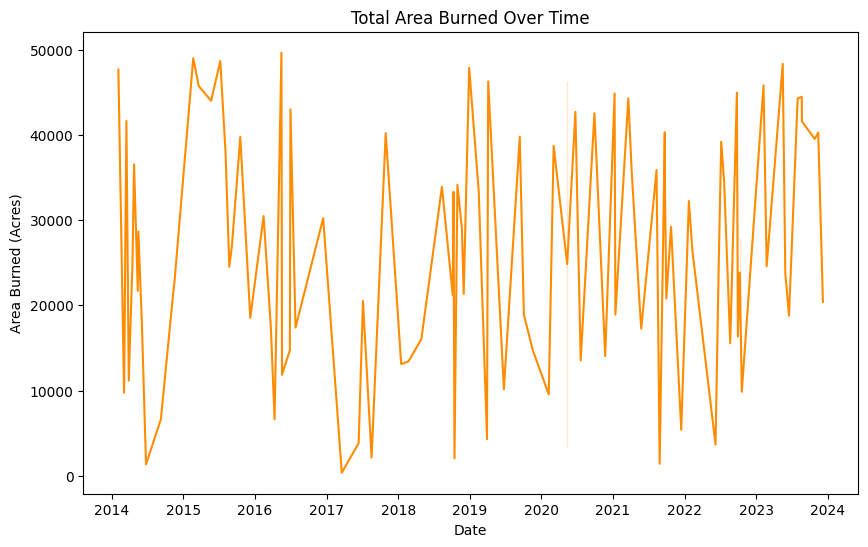

In [6]:
# Total area burned over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Date', y='Area_burned', color=palette_1[0])
plt.title("Total Area Burned Over Time")
plt.xlabel("Date")
plt.ylabel("Area Burned (Acres)")
plt.show()

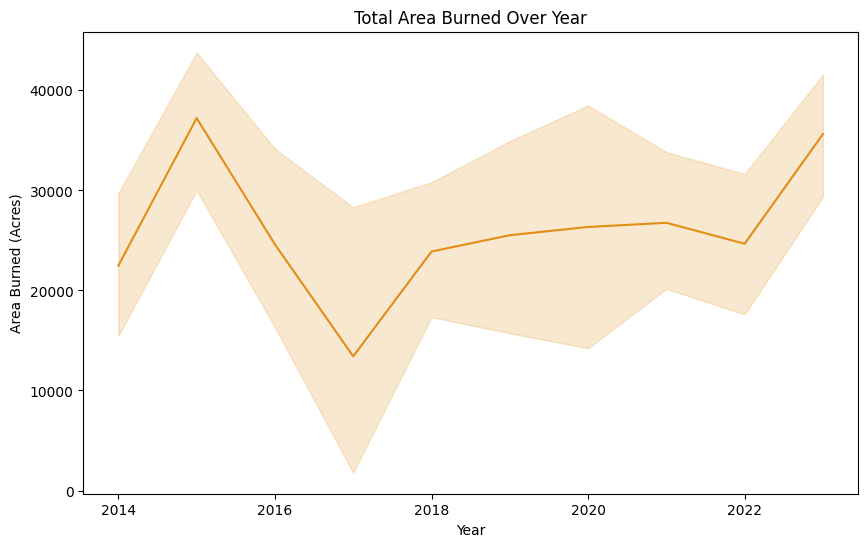

In [7]:
# Total area burned over year
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='Area_burned', color=palette_1[2])
plt.title("Total Area Burned Over Year")
plt.xlabel("Year")
plt.ylabel("Area Burned (Acres)")
plt.show()

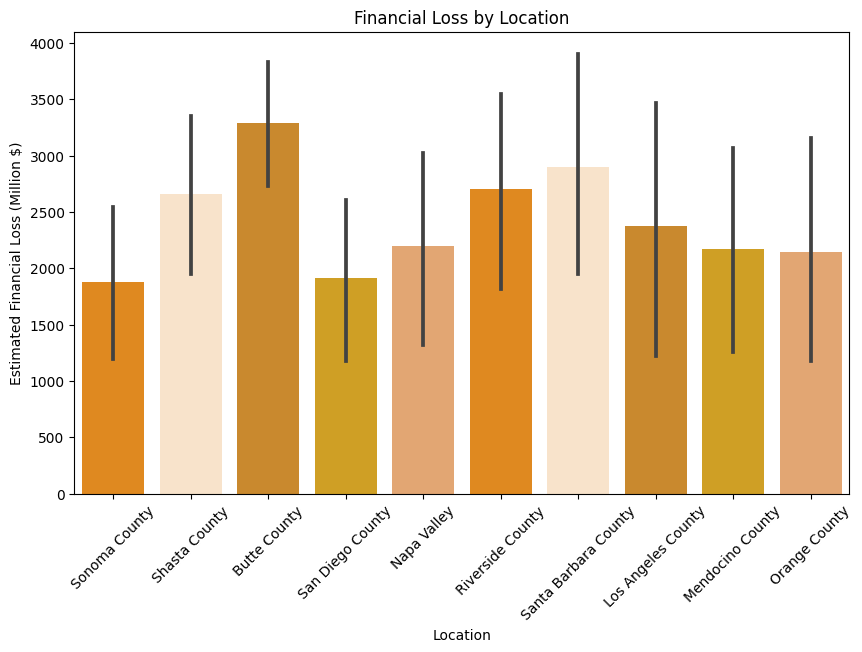

In [8]:
# Total financial loss per location
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="Location", y="F_loss", palette=palette_1)
plt.title("Financial Loss by Location")
plt.xlabel("Location")
plt.ylabel("Estimated Financial Loss (Million $)")
plt.xticks(rotation=45)
plt.show()

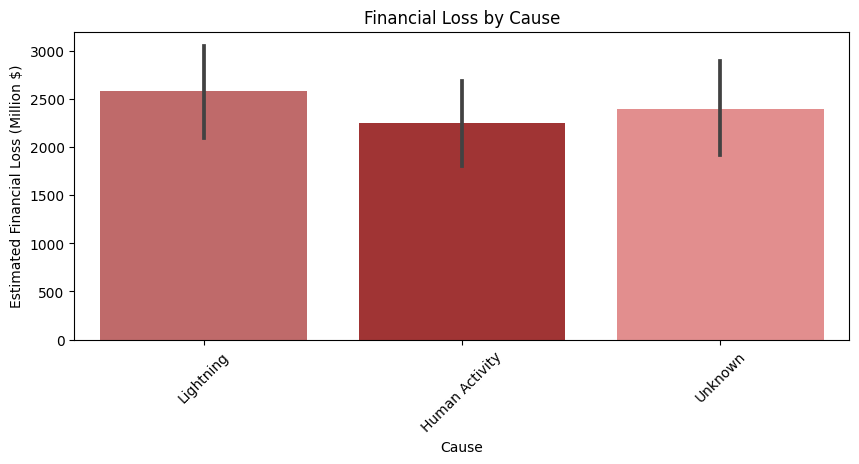

In [9]:
# Total financial loss per cause
plt.figure(figsize=(10, 4))
sns.barplot(data=data, x="Cause", y="F_loss", palette=palette_2)
plt.title("Financial Loss by Cause")
plt.xlabel("Cause")
plt.ylabel("Estimated Financial Loss (Million $)")
plt.xticks(rotation=45)
plt.show()

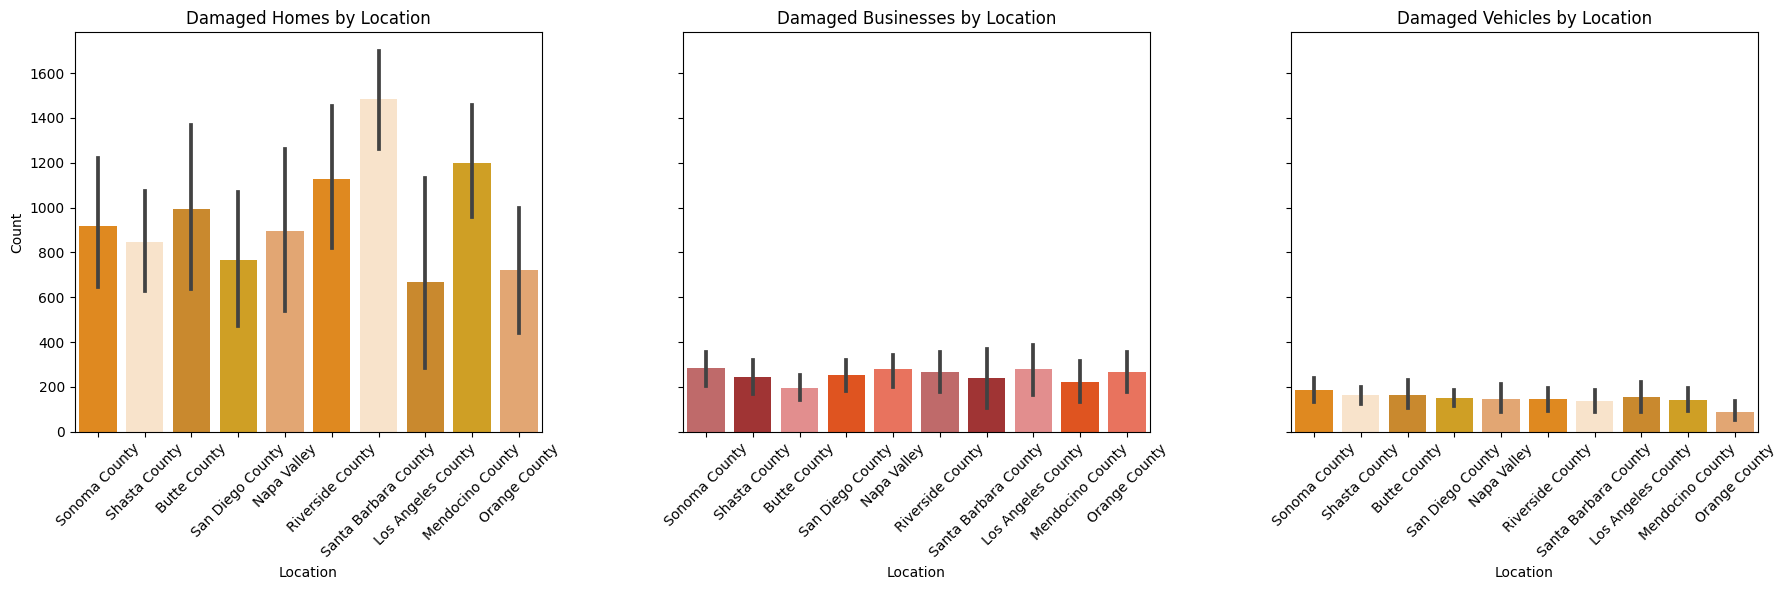

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Homes Destroyed
sns.barplot(data=data, x="Location", y="Homes_d", palette = palette_1, ax=axes[0])
axes[0].set_title("Damaged Homes by Location")
axes[0].set_xlabel("Location")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=45)

# Businesses Destroyed
sns.barplot(data=data, x="Location", y="Business_d", palette = palette_2, ax=axes[1])
axes[1].set_title("Damaged Businesses by Location")
axes[1].set_xlabel("Location")
axes[1].set_ylabel("")
axes[1].tick_params(axis="x", rotation=45)

# Vehicles Damaged
sns.barplot(data=data, x="Location", y="Vehicles_d", palette = palette_1, ax=axes[2])
axes[2].set_title("Damaged Vehicles by Location")
axes[2].set_xlabel("Location")
axes[2].set_ylabel("")
axes[2].tick_params(axis="x", rotation=45)


plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

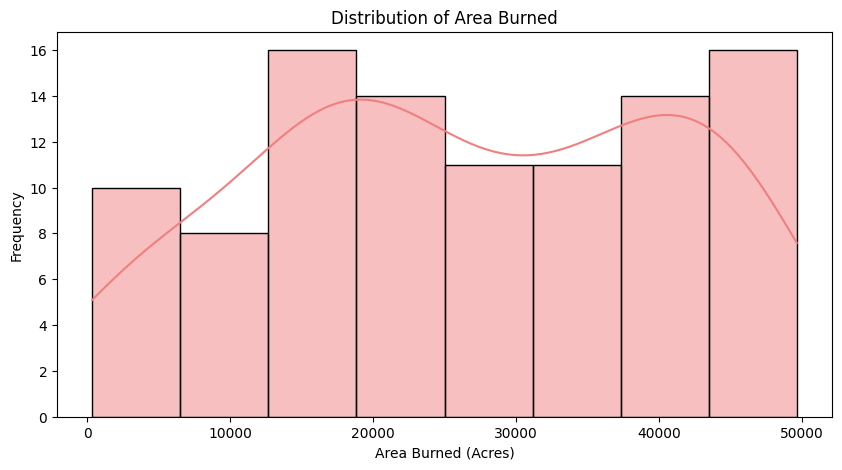

In [11]:
# Distribution of area burned
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x="Area_burned", kde=True, color=palette_2[2])
plt.title("Distribution of Area Burned")
plt.xlabel("Area Burned (Acres)")
plt.ylabel("Frequency")
plt.show()

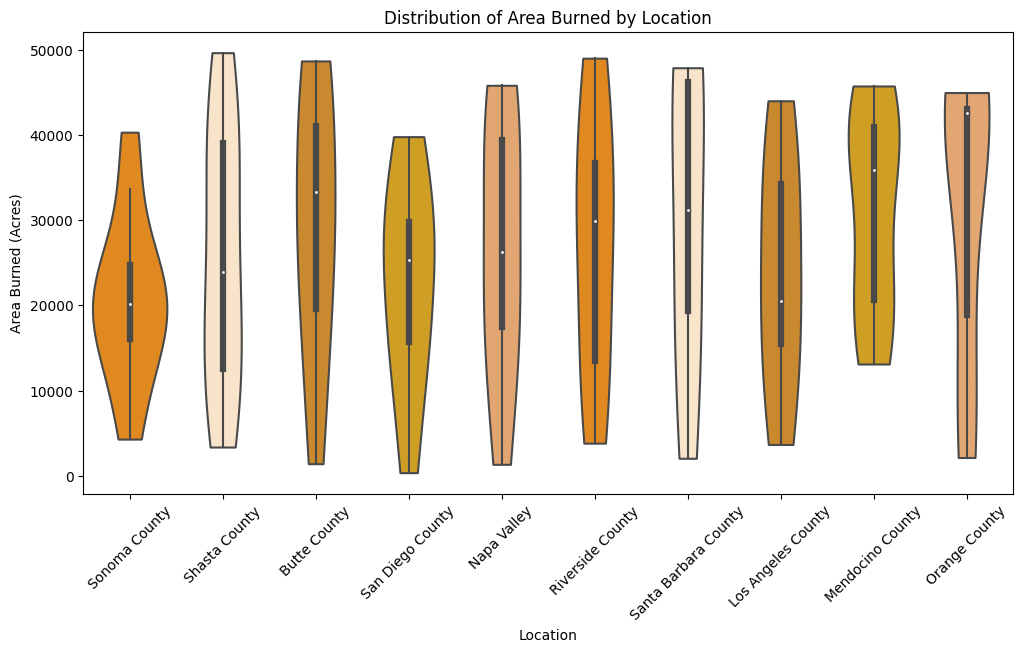

In [12]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x="Location", y="Area_burned", palette= palette_1, cut=0)
plt.title("Distribution of Area Burned by Location")
plt.xlabel("Location")
plt.ylabel("Area Burned (Acres)")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

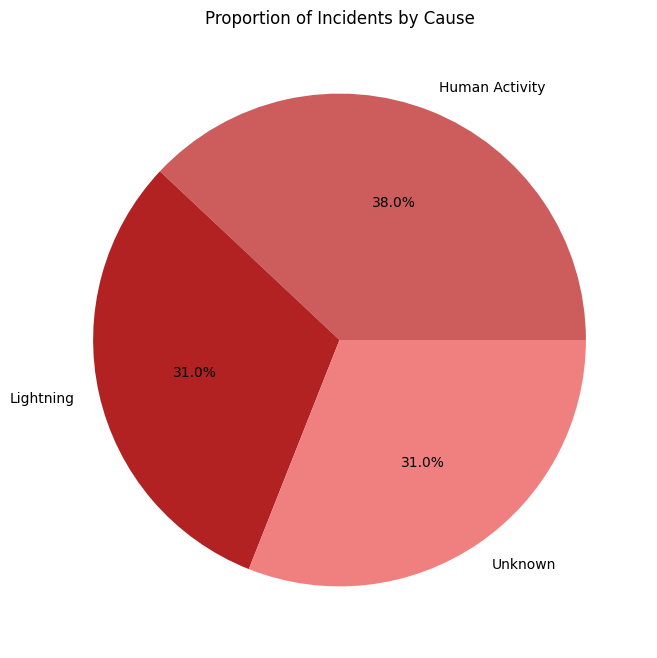

In [13]:
#Proportion of incidents by cause
cause_counts = data["Cause"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', colors=palette_2)
plt.title("Proportion of Incidents by Cause")
plt.show()

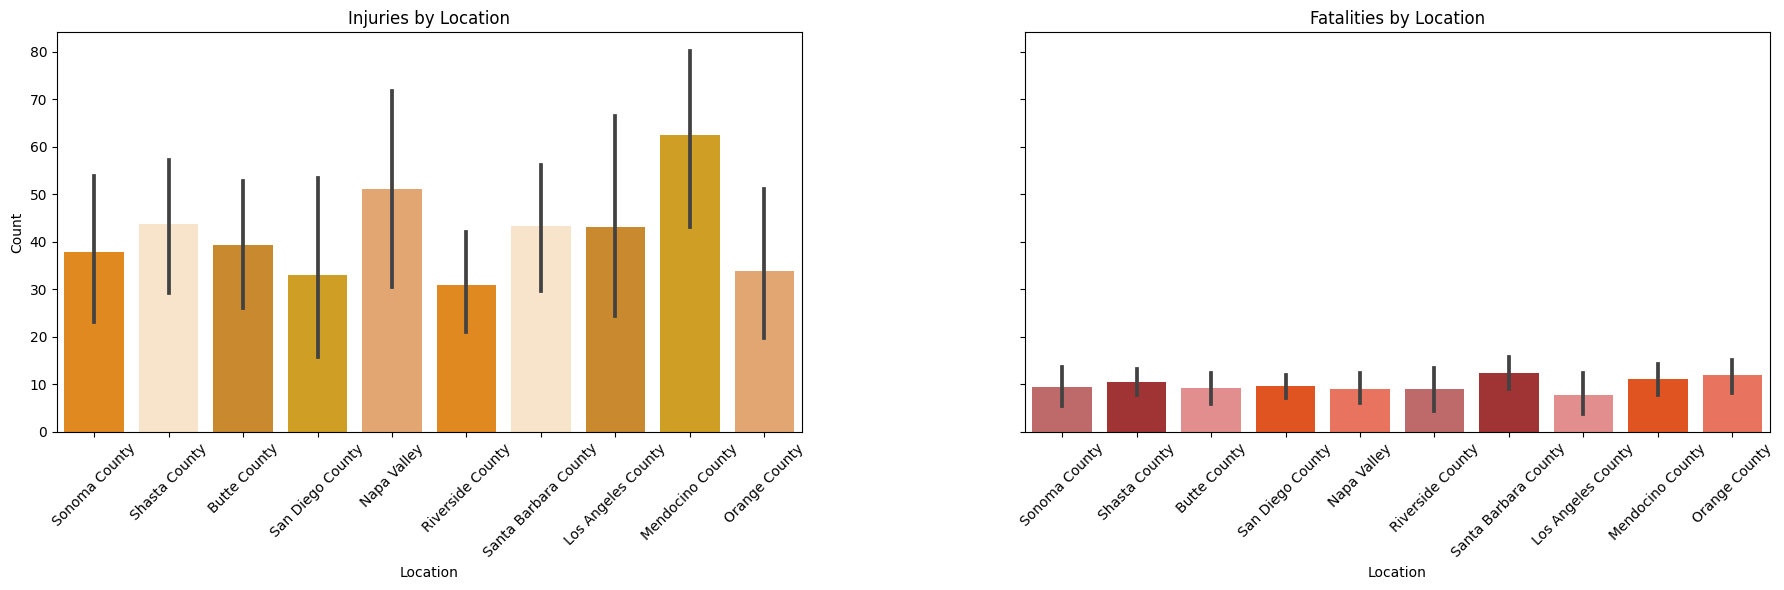

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Injuries
sns.barplot(data=data, x="Location", y="Injuries", palette = palette_1, ax=axes[0])
axes[0].set_title("Injuries by Location")
axes[0].set_xlabel("Location")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=45)

# fatalities
sns.barplot(data=data, x="Location", y="Fatalities", palette = palette_2, ax=axes[1])
axes[1].set_title("Fatalities by Location")
axes[1].set_xlabel("Location")
axes[1].set_ylabel("")
axes[1].tick_params(axis="x", rotation=45)



plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

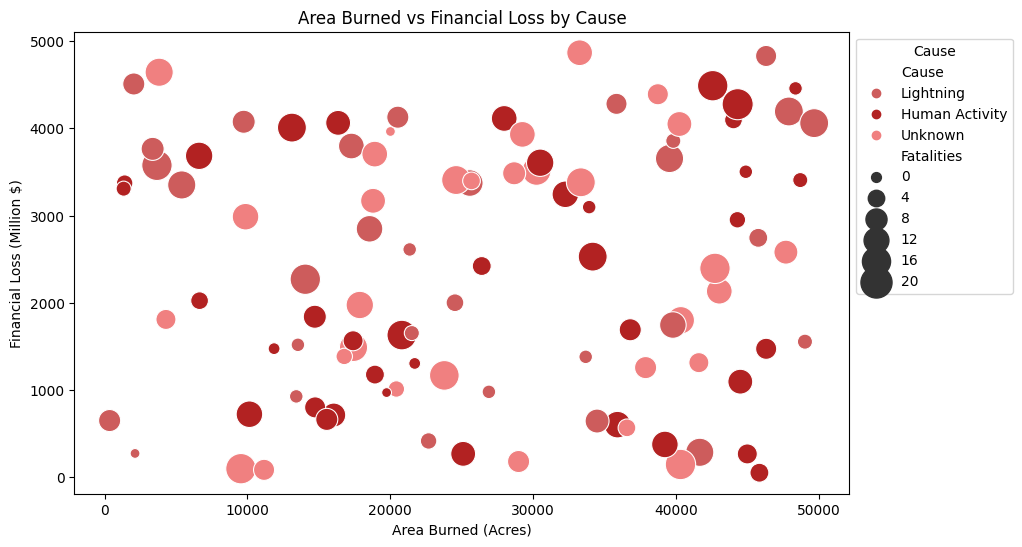

In [15]:

# Area Burned vs Financial Loss, sized by Fatalities
plt.figure(figsize=(10, 6))
sns.scatterplot(data= data, x= "Area_burned", y= "F_loss", size= "Fatalities", hue= "Cause", sizes=(50, 500), palette=palette_2)
plt.title("Area Burned vs Financial Loss by Cause")
plt.xlabel("Area Burned (Acres)")
plt.ylabel("Financial Loss (Million $)")
plt.legend(title="Cause", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

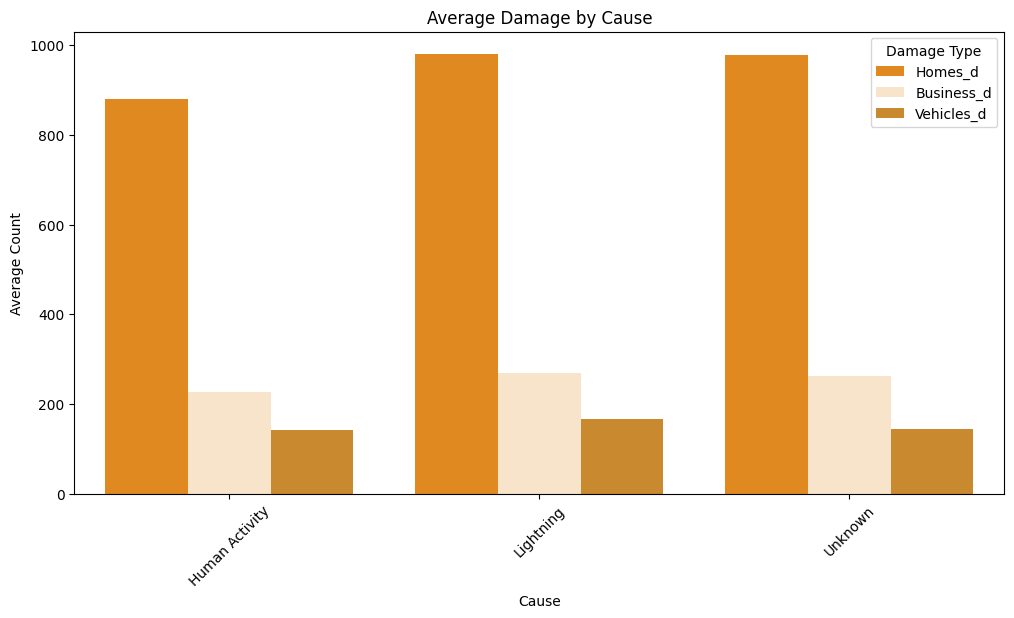

In [16]:
# Average number of homes, businesses, and vehicles destroyed per cause
damage_avg = data.groupby("Cause")[["Homes_d", "Business_d", "Vehicles_d"]].mean().reset_index()
damage_avg_melted = damage_avg.melt(id_vars='Cause', var_name='Type', value_name='Average Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=damage_avg_melted, x= "Cause", y='Average Count', hue='Type', palette=palette_1)
plt.title("Average Damage by Cause")
plt.xlabel("Cause")
plt.ylabel("Average Count")
plt.xticks(rotation=45)
plt.legend(title="Damage Type")
plt.show()

<a id="1"></a>
# <p style="background-color:#c46002;font-family:georgia,serif;color:#FFF8ED;font-size:160%;text-align:center;border-radius:10px 10px;">Thank You!</p>